In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# 簡易計算と詳細計算の比較
## 詳細計算の結果を読み込む

In [2]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_detailed.csv', index_col=0)

# 収束しなかった場合のデータを削除する
df = df.query("is_optimize_succeed == True")

# 分析用にメッセージ列を削除
df = df.drop(["is_optimize_succeed", "optimize_message"], axis=1)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 冬期条件、夏期条件の計算結果を抽出
df_detailed = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_detailed

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,...,h_cv,h_rv,theta_as_e,k_e,q_room_side,heat_balance_0,heat_balance_1,heat_balance_2,heat_balance_3,heat_balance_4
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,2.825350,0.434728,-4.623813,0.820794,-2.363617,0.000000e+00,2.220446e-15,-1.776357e-15,2.842171e-14,-2.220446e-16
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,2.488053,2.077843,-4.887580,0.829586,-2.409223,0.000000e+00,3.552714e-15,3.552714e-15,0.000000e+00,-4.440892e-16
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,2.281691,3.586179,-4.949801,0.831660,-2.426662,-2.842171e-14,3.552714e-15,-7.105427e-15,-2.842171e-14,-4.440892e-16
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,4.362720,0.410906,-9.856252,0.995208,-2.892881,2.842171e-14,8.881784e-15,0.000000e+00,0.000000e+00,0.000000e+00
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,4.109646,1.968272,-9.814749,0.993825,-2.901498,-2.842171e-14,-3.552714e-15,-7.105427e-15,0.000000e+00,-8.881784e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,5.692031,3.780112,50.470072,0.488960,56.325852,0.000000e+00,-4.547474e-13,-1.136868e-13,8.526513e-14,0.000000e+00
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,5.396892,6.610045,53.646967,0.555145,67.563938,-1.818989e-12,-2.842171e-13,-2.273737e-13,2.842171e-14,0.000000e+00
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,8.095389,0.760302,40.829960,0.288124,32.615303,-9.094947e-13,4.227729e-13,5.684342e-14,-2.842171e-14,-3.552714e-15
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,7.711546,3.701609,46.506060,0.406376,48.920559,-9.094947e-13,1.023182e-12,2.273737e-13,-8.526513e-14,7.105427e-15


## 簡易計算の結果を読み込む
### 簡易計算法案①（簡易版の行列式による方法）の計算結果

In [3]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_simplified_equation_no01.csv', index_col=0)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 相当外気温度と室温が同じ値となるケースを除外
df = df.query("theta_sat != theta_r")

# 冬期条件、夏期条件の計算結果を抽出
df_simplified_no_01 = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_simplified_no_01

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,...,emissivity_1,emissivity_2,theta_sat,theta_1_surf,theta_2_surf,theta_as_ave,effective_emissivity,h_cv,h_rv,q_room_side
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-5.202582,-3.778054,-4.490318,0.098901,2.3020,0.499846,-2.351676
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-5.077695,-4.397047,-4.737371,0.473684,2.3020,2.394000,-2.412895
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.9,-10.0,-5.040634,-4.580736,-4.810685,0.818182,2.3020,4.135091,-2.431062
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-9.815997,-9.257258,-9.859560,0.098901,4.3405,0.499846,-2.893575
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-9.710173,-9.376337,-9.861569,0.473684,4.3405,2.394000,-2.905352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,66.269147,43.787628,39.561547,0.473684,3.9005,3.133421,53.960234
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.9,75.0,65.254919,47.536094,39.872914,0.818182,3.9005,5.412273,66.008875
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.1,75.0,65.737757,36.179881,37.886964,0.098901,5.9570,0.654231,29.506761
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,63.898401,41.833940,38.232005,0.473684,5.9570,3.133421,47.680521


### 簡易計算法案②（簡易式による方法）の計算結果

In [4]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_simplified_equation_no02.csv', index_col=0)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 相当外気温度と室温が同じ値となるケースを除外
df = df.query("theta_sat != theta_r")

# 冬期条件、夏期条件の計算結果を抽出
df_simplified_no_02 = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_simplified_no_02

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,...,emissivity_1,emissivity_2,theta_sat,theta_as_ave,effective_emissivity,h_cv,h_rv,u_o,u_i,q_room_side
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-4.410599,0.098901,2.3020,0.499846,0.417204,0.095529,-2.331922
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-4.626033,0.473684,2.3020,2.394000,0.443863,0.096861,-2.385305
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.9,-10.0,-4.715014,0.818182,2.3020,4.135091,0.455508,0.097405,-2.407355
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-8.078939,0.098901,4.3405,0.499846,0.445118,0.096921,-2.721432
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-8.080037,0.473684,4.3405,2.394000,0.456936,0.097470,-2.736952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,35.649700,0.473684,3.9005,3.133421,5.203774,2.206145,19.082493
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.9,75.0,35.799172,0.818182,3.9005,5.412273,6.354072,2.389540,21.025977
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.1,75.0,35.312156,0.098901,5.9570,0.654231,4.968752,2.162775,17.977327
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,35.396711,0.473684,5.9570,3.133421,6.249769,2.374637,19.939139


### 簡易計算法案③（通気層を有する壁体の修正熱貫流率、修正日射熱取得率、室内表面熱流を求める）の計算結果

In [5]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_simplified_equation_no03.csv', index_col=0)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 相当外気温度と室温が同じ値となるケースを除外
df = df.query("theta_sat != theta_r")

# 冬期条件、夏期条件の計算結果を抽出
df_simplified_no_03 = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_simplified_no_03

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,v_a,l_s,emissivity_1,emissivity_2,theta_sat,h_cv,h_rv,u_dash,eta_dash,q_room_side
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.0,0.45,0.9,0.1,-10.0,2.3020,0.499846,0.095438,0.000000,-2.863154
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.0,0.45,0.9,0.5,-10.0,2.3020,2.394000,0.096250,0.000000,-2.887505
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.0,0.45,0.9,0.9,-10.0,2.3020,4.135091,0.096496,0.000000,-2.894892
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.5,0.45,0.9,0.1,-10.0,4.3405,0.499846,0.096452,0.000000,-2.893575
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.5,0.45,0.9,0.5,-10.0,4.3405,2.394000,0.096845,0.000000,-2.905352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,0.5,0.45,0.9,0.5,75.0,3.9005,3.133421,2.106059,0.167195,184.043179
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,0.5,0.45,0.9,0.9,75.0,3.9005,5.412273,2.265978,0.185325,203.453234
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,1.0,0.45,0.9,0.1,75.0,5.9570,0.654231,2.095188,0.182696,199.457305
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,1.0,0.45,0.9,0.5,75.0,5.9570,3.133421,2.299462,0.216175,234.570704


### 簡易計算法案④（簡易計算法案No.3をさらに簡略化）の計算結果

In [6]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_simplified_equation_no04.csv', index_col=0)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 相当外気温度と室温が同じ値となるケースを除外
df = df.query("theta_sat != theta_r")

# 冬期条件、夏期条件の計算結果を抽出
df_simplified_no_04 = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_simplified_no_04

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,v_a,l_s,emissivity_1,emissivity_2,theta_sat,h_cv,h_rv,u_dash,eta_dash,q_room_side
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.0,0.45,0.9,0.1,-10.0,2.3020,0.499846,0.095208,0.406609,-2.856232
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.0,0.45,0.9,0.5,-10.0,2.3020,2.394000,0.095417,0.406969,-2.862522
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.0,0.45,0.9,0.9,-10.0,2.3020,4.135091,0.095456,0.407015,-2.863677
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.5,0.45,0.9,0.1,-10.0,4.3405,0.499846,0.096401,0.432127,-2.892015
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,0.5,0.45,0.9,0.5,-10.0,4.3405,2.394000,0.096498,0.432300,-2.894952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,0.5,0.45,0.9,0.5,75.0,3.9005,3.133421,2.106042,3.990977,4007.825563
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,0.5,0.45,0.9,0.9,75.0,3.9005,5.412273,2.264085,4.261803,4279.915928
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,1.0,0.45,0.9,0.1,75.0,5.9570,0.654231,2.092793,4.560869,4577.611326
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,1.0,0.45,0.9,0.5,75.0,5.9570,3.133421,2.299001,5.158401,5176.792850


## 作図用の関数を定義
### 推定値の確認用グラフ

In [7]:
def setPltComparison(fig_title:str, x_label:str, y_label:str, x_data:np.array, y_data:np.array,
                     xlim_min:float, xlim_max:float, ylim_min:float, ylim_max:float):
    
    # グラフを表示する領域（figureオブジェクト）、グラフを描画する領域（Axesオブジェクト）を作成
    fig, ax = plt.subplots()

    # グラフタイトルを設定
    fig.suptitle(fig_title)
        
    # 補助軸の設定
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='gray', linestyle='-')
        
    # 軸ラベルの設定
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
        
    # 描画データ設定
    x = x_data
    y = y_data
                
    # 散布図の描画設定
    ax.scatter(x, y, s=30, marker=".")

    # 線形グラフの描画設定    
    ax.plot([xlim_min, xlim_max], [ylim_min, ylim_max],color="black")
        
    # 軸の描画範囲設定
    #ax.set_xlim(xlim_min, xlim_max)
    #ax.set_ylim(ylim_min, ylim_max)
    
    # グラフ描画
    plt.show()

## 計算結果の比較

- Simplified Method #1 : 簡易版の行列式による計算結果
- Simplified Method #2 : 簡易式による計算結果（放射熱伝達率をゼロとした場合）
- Simplified Method #2rev : 簡易式による計算結果（通気層内の総合熱伝達を適用した場合）

### 室内表面熱流(q_room_side)の比較

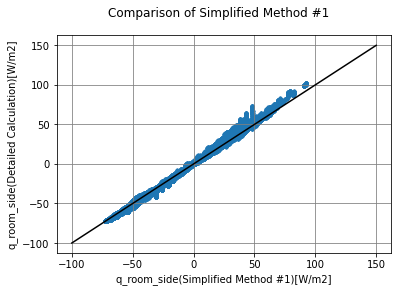

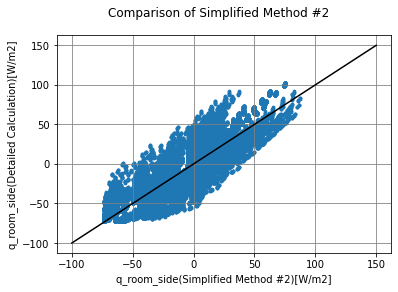

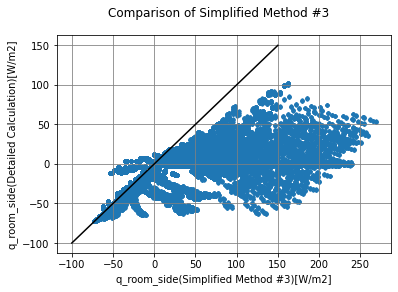

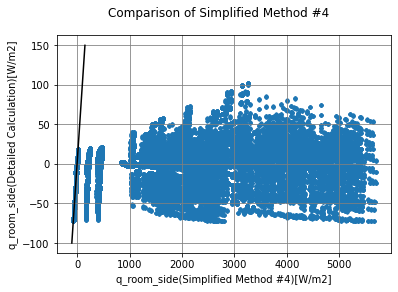

In [8]:
setPltComparison(
       fig_title = "Comparison of Simplified Method #1",
       x_label = "q_room_side(Simplified Method #1)[W/m2]",
       y_label = "q_room_side(Detailed Calculation)[W/m2]", 
       x_data = df_simplified_no_01["q_room_side"],
       y_data = df_detailed["q_room_side"],
       xlim_min = -100.0,
       xlim_max = 150.0,
       ylim_min = -100.0,
       ylim_max = 150.0
      )

setPltComparison(
       fig_title = "Comparison of Simplified Method #2",
       x_label = "q_room_side(Simplified Method #2)[W/m2]",
       y_label = "q_room_side(Detailed Calculation)[W/m2]", 
       x_data = df_simplified_no_02["q_room_side"],
       y_data = df_detailed["q_room_side"],
       xlim_min = -100.0,
       xlim_max = 150.0,
       ylim_min = -100.0,
       ylim_max = 150.0
      )

setPltComparison(
       fig_title = "Comparison of Simplified Method #3",
       x_label = "q_room_side(Simplified Method #3)[W/m2]",
       y_label = "q_room_side(Detailed Calculation)[W/m2]", 
       x_data = df_simplified_no_03["q_room_side"],
       y_data = df_detailed["q_room_side"],
       xlim_min = -100.0,
       xlim_max = 150.0,
       ylim_min = -100.0,
       ylim_max = 150.0
      )

setPltComparison(
       fig_title = "Comparison of Simplified Method #4",
       x_label = "q_room_side(Simplified Method #4)[W/m2]",
       y_label = "q_room_side(Detailed Calculation)[W/m2]", 
       x_data = df_simplified_no_04["q_room_side"],
       y_data = df_detailed["q_room_side"],
       xlim_min = -100.0,
       xlim_max = 150.0,
       ylim_min = -100.0,
       ylim_max = 150.0
      )

### 室内表面熱流(q_room_side)の比較：放射率別に描画
#### 簡易計算法①

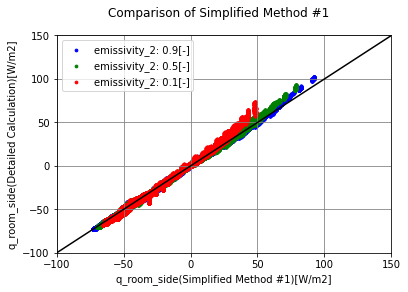

In [9]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# グラフタイトルを設定
fig1.suptitle("Comparison of Simplified Method #1")
    
# 補助軸の設定
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='gray', linestyle='-')

# 軸ラベルの設定
ax.set_xlabel('q_room_side(Simplified Method #1)[W/m2]')
ax.set_ylabel('q_room_side(Detailed Calculation)[W/m2]')

# 散布図の描画設定
ax.scatter(df_simplified_no_01.query("emissivity_2 == 0.9")['q_room_side'], df_detailed.query("emissivity_2 == 0.9")['q_room_side'], color='b', label='emissivity_2: 0.9[-]', s=30, marker=".")
ax.scatter(df_simplified_no_01.query("emissivity_2 == 0.5")['q_room_side'], df_detailed.query("emissivity_2 == 0.5")['q_room_side'], color='g', label='emissivity_2: 0.5[-]', s=30, marker=".")
ax.scatter(df_simplified_no_01.query("emissivity_2 == 0.1")['q_room_side'], df_detailed.query("emissivity_2 == 0.1")['q_room_side'], color='r', label='emissivity_2: 0.1[-]', s=30, marker=".")

# 線形グラフの描画設定    
ax.plot([-100.0, 150.0], [-100.0, 150.0],color="black")

# 軸の描画範囲設定
ax.set_xlim(-100.0, 150.0)
ax.set_ylim(-100.0, 150.0)
    
plt.legend()
plt.show()

#### 簡易計算法②

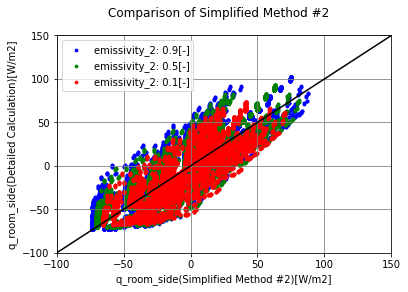

In [10]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# グラフタイトルを設定
fig1.suptitle("Comparison of Simplified Method #2")
    
# 補助軸の設定
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='gray', linestyle='-')

# 軸ラベルの設定
ax.set_xlabel('q_room_side(Simplified Method #2)[W/m2]')
ax.set_ylabel('q_room_side(Detailed Calculation)[W/m2]')

# 散布図の描画設定
ax.scatter(df_simplified_no_02.query("emissivity_2 == 0.9")['q_room_side'], df_detailed.query("emissivity_2 == 0.9")['q_room_side'], color='b', label='emissivity_2: 0.9[-]', s=30, marker=".")
ax.scatter(df_simplified_no_02.query("emissivity_2 == 0.5")['q_room_side'], df_detailed.query("emissivity_2 == 0.5")['q_room_side'], color='g', label='emissivity_2: 0.5[-]', s=30, marker=".")
ax.scatter(df_simplified_no_02.query("emissivity_2 == 0.1")['q_room_side'], df_detailed.query("emissivity_2 == 0.1")['q_room_side'], color='r', label='emissivity_2: 0.1[-]', s=30, marker=".")

# 線形グラフの描画設定    
ax.plot([-100.0, 150.0], [-100.0, 150.0],color="black")

# 軸の描画範囲設定
ax.set_xlim(-100.0, 150.0)
ax.set_ylim(-100.0, 150.0)
    
plt.legend()
plt.show()

#### 簡易計算法③

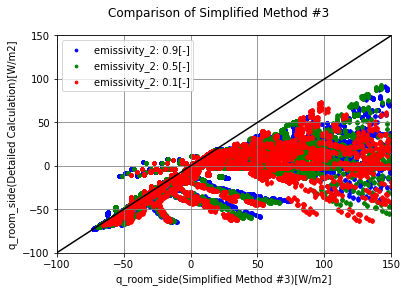

In [11]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# グラフタイトルを設定
fig1.suptitle("Comparison of Simplified Method #3")
    
# 補助軸の設定
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='gray', linestyle='-')

# 軸ラベルの設定
ax.set_xlabel('q_room_side(Simplified Method #3)[W/m2]')
ax.set_ylabel('q_room_side(Detailed Calculation)[W/m2]')

# 散布図の描画設定
ax.scatter(df_simplified_no_03.query("emissivity_2 == 0.9")['q_room_side'], df_detailed.query("emissivity_2 == 0.9")['q_room_side'], color='b', label='emissivity_2: 0.9[-]', s=30, marker=".")
ax.scatter(df_simplified_no_03.query("emissivity_2 == 0.5")['q_room_side'], df_detailed.query("emissivity_2 == 0.5")['q_room_side'], color='g', label='emissivity_2: 0.5[-]', s=30, marker=".")
ax.scatter(df_simplified_no_03.query("emissivity_2 == 0.1")['q_room_side'], df_detailed.query("emissivity_2 == 0.1")['q_room_side'], color='r', label='emissivity_2: 0.1[-]', s=30, marker=".")

# 線形グラフの描画設定    
ax.plot([-100.0, 150.0], [-100.0, 150.0],color="black")

# 軸の描画範囲設定
ax.set_xlim(-100.0, 150.0)
ax.set_ylim(-100.0, 150.0)
    
plt.legend()
plt.show()

#### 簡易計算法④

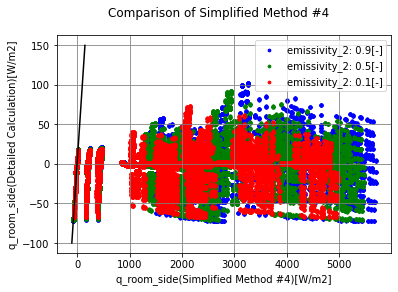

In [12]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# グラフタイトルを設定
fig1.suptitle("Comparison of Simplified Method #4")
    
# 補助軸の設定
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='gray', linestyle='-')

# 軸ラベルの設定
ax.set_xlabel('q_room_side(Simplified Method #4)[W/m2]')
ax.set_ylabel('q_room_side(Detailed Calculation)[W/m2]')

# 散布図の描画設定
ax.scatter(df_simplified_no_04.query("emissivity_2 == 0.9")['q_room_side'], df_detailed.query("emissivity_2 == 0.9")['q_room_side'], color='b', label='emissivity_2: 0.9[-]', s=30, marker=".")
ax.scatter(df_simplified_no_04.query("emissivity_2 == 0.5")['q_room_side'], df_detailed.query("emissivity_2 == 0.5")['q_room_side'], color='g', label='emissivity_2: 0.5[-]', s=30, marker=".")
ax.scatter(df_simplified_no_04.query("emissivity_2 == 0.1")['q_room_side'], df_detailed.query("emissivity_2 == 0.1")['q_room_side'], color='r', label='emissivity_2: 0.1[-]', s=30, marker=".")

# 線形グラフの描画設定    
ax.plot([-100.0, 150.0], [-100.0, 150.0],color="black")

# 軸の描画範囲設定
#ax.set_xlim(-100.0, 150.0)
#ax.set_ylim(-100.0, 150.0)
    
plt.legend()
plt.show()

### 簡易計算法③の計算結果分析
#### 日射量=0の場合（風速別に描画）

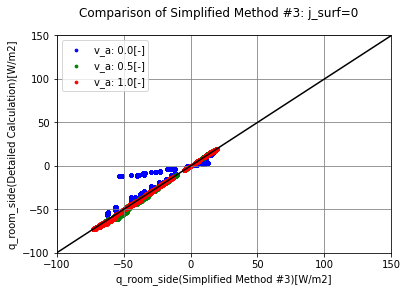

In [13]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# グラフタイトルを設定
fig1.suptitle("Comparison of Simplified Method #3: j_surf=0")
    
# 補助軸の設定
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='gray', linestyle='-')

# 軸ラベルの設定
ax.set_xlabel('q_room_side(Simplified Method #3)[W/m2]')
ax.set_ylabel('q_room_side(Detailed Calculation)[W/m2]')

# 散布図の描画設定
df_simple = df_simplified_no_03.query("j_surf == 0.0")
df_detail = df_detailed.query("j_surf == 0.0")

ax.scatter(df_simple.query("v_a == 0.0")['q_room_side'], df_detail.query("v_a == 0.0")['q_room_side'], color='b', label='v_a: 0.0[-]', s=30, marker=".")
ax.scatter(df_simple.query("v_a == 0.5")['q_room_side'], df_detail.query("v_a == 0.5")['q_room_side'], color='g', label='v_a: 0.5[-]', s=30, marker=".")
ax.scatter(df_simple.query("v_a == 1.0")['q_room_side'], df_detail.query("v_a == 1.0")['q_room_side'], color='r', label='v_a: 1.0[-]', s=30, marker=".")

# 線形グラフの描画設定    
ax.plot([-100.0, 150.0], [-100.0, 150.0],color="black")

# 軸の描画範囲設定
ax.set_xlim(-100.0, 150.0)
ax.set_ylim(-100.0, 150.0)
    
plt.legend()
plt.show()